In [2]:
import seaborn as sns
import numpy as np 
import pickle
from collections import Counter
import matplotlib.pyplot as plt


In [15]:
game_amount = 100000
# tsetlin_filename, ranges, self_can_bet_index = "/home/jaoi/master22/pet_for_sale/winning_games_db/{}_tsetlined_games.pkl".format(game_amount), 19, 17
tsetlin_filename, ranges, self_can_bet_index = "/home/jaoi/master22/pet_for_sale/winning_games_db/3PPO_{}_tsetlined_games.pkl".format(game_amount), 17, 21
with open(tsetlin_filename, "rb") as fp:
        games = pickle.load(fp)

In [16]:
ys = Counter()
for game in games:
    ys[game[1]] += 1
ys

Counter({6: 66359,
         9: 21579,
         0: 222902,
         3: 28431,
         4: 49539,
         7: 16471,
         8: 42130,
         2: 41488,
         10: 18214,
         13: 2441,
         11: 7406,
         1: 9881,
         5: 16265,
         12: 8139,
         14: 699,
         16: 10,
         15: 317})

In [17]:
bets = list(range(ranges))
votes = np.array([ys[bet] for bet in bets])
bets_nz = bets[1:]
votes_nz = votes[1:]
len(bets_nz)
len(votes_nz)

16

In [18]:
# self_can_bet_index = 21


where_can = []
for i, game in enumerate(games):
    if game[0][self_can_bet_index] == 1:
        where_can.append(i)
indexes = np.array(where_can)
games_can_bid = games[indexes]

In [19]:
yc = Counter()
for game in games_can_bid:
    yc[game[1]] += 1

bets_c = list(range(ranges))
votes_c = np.array([yc[bet] for bet in bets])    
yc.most_common()

[(0, 89032),
 (10, 11598),
 (9, 11401),
 (6, 9597),
 (7, 6161),
 (8, 4442),
 (11, 3229),
 (5, 1897),
 (14, 656),
 (13, 401),
 (12, 335),
 (4, 99),
 (15, 11)]

In [20]:
def remove_duplicate_pairs(games):
    new_games = []
    for i,game in enumerate(games):
        int_arr = game[0].astype(int)
        complete_arr = np.append(int_arr, game[1])
        new_games.append(complete_arr)

    new_games = np.array(new_games)
    
    x = np.random.rand(new_games.shape[1])
    y = new_games.dot(x)
    unique, index = np.unique(y, return_index=True)
    unique_xy = new_games[index]
    
    unique_pairs = []
    for game in unique_xy:
        last, rest = game[-1], game[:-1]
        unique_pairs.append(np.array((rest.astype(np.float32), last), dtype=object))
    return np.array(unique_pairs)
unique_pairs = remove_duplicate_pairs(games_can_bid)


In [21]:
ysu = Counter()
for game in unique_pairs:
    ysu[game[1]] += 1
ysu.most_common()

[(0, 34458),
 (10, 4504),
 (9, 3241),
 (6, 3183),
 (11, 2042),
 (5, 932),
 (8, 877),
 (7, 858),
 (14, 345),
 (13, 306),
 (12, 243),
 (4, 91),
 (15, 11)]

In [22]:
bets_r = list(range(ranges))
votes_r = np.array([ysu[bet] for bet in bets])

In [37]:
need_of_oversample = [tup for tup in ysu.most_common() if tup[1] < 2000]

def oversample(info_tup, desired_amount, source_games):
    bob = []
    for game in source_games:
        if game[1] == info_tup[0]:
            bob.append(game)
    indexes = np.random.randint(0, info_tup[1], desired_amount - info_tup[1])
    temp = []
    for ind in indexes:
        temp.append(bob[ind])
    return np.array(temp)

unique_oversample = np.copy(unique_pairs)
temp = []
for overnd in need_of_oversample:
    temp.extend(oversample(overnd, 1000, unique_pairs))
unique_oversample = np.concatenate((unique_oversample, np.array(temp)), axis=0)

In [38]:
uo = Counter()
for game in unique_oversample:
    uo[game[1]] += 1
uo

Counter({0: 34458,
         4: 1000,
         6: 3183,
         5: 1000,
         7: 1000,
         8: 1000,
         9: 3241,
         10: 4504,
         13: 1000,
         11: 2042,
         12: 1000,
         14: 1000,
         15: 1000})

In [39]:
bets_o = list(range(ranges))
votes_o = np.array([uo[bet] for bet in bets])

raw


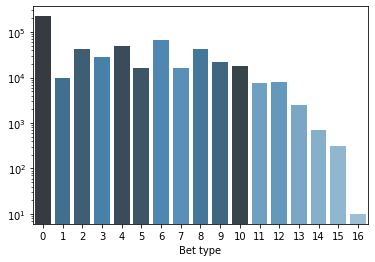

can_bid


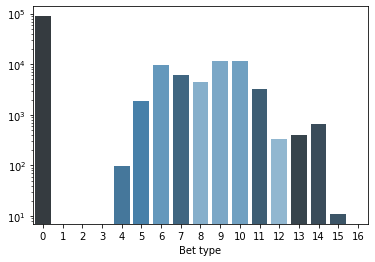

remove duplicates


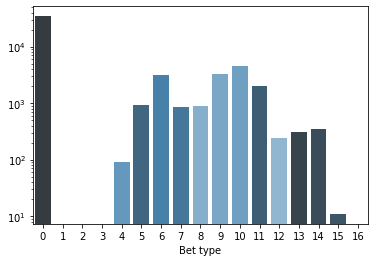

oversample


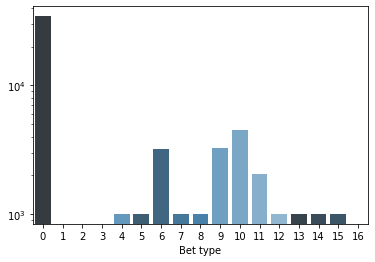

In [40]:
def visualize_y_distribution(classes, frequency, name=False):
    
    bets_n_votes = list(zip(classes, frequency))
    bets_n_votes.sort(reverse=True, key=lambda x:x[1])
    pal = sns.color_palette("Blues_d", len(bets_n_votes) + 1)
    bet_rank = [tup[0] for tup in bets_n_votes]
    ax = sns.barplot(x=classes, y=frequency, palette=np.array(pal[::-1])[bet_rank])
    # ax.set(ylim=(0, 40000))
    ax.set(yscale="log")
    ax.set_xlabel("Bet type")
    # ax.set_ylabel("Bet amount")
    
    if name:
        plt.savefig(name)
        plt.show()
        
    else:
        plt.show()

print("raw")
visualize_y_distribution(bets, votes, "plots/PPO3r_rawscale_raw")
print("can_bid")
visualize_y_distribution(bets_c, votes_c, "plots/PPO3r_rawscale_canbid")
print("remove duplicates")
visualize_y_distribution(bets_r, votes_r, "plots/PPO3r_rawscale_remdupes")
print("oversample")
visualize_y_distribution(bets_o, votes_o, "plots/PPO3r_rawscale_oversample")


In [ ]:
sns.set_theme(style="whitegrid")
bets_n_votes = list(zip(bets, votes))
bets_n_votes.sort(reverse=True, key=lambda x:x[1])
pal = sns.color_palette("Blues_d", len(bets_n_votes))

bet_rank = [tup[0] for tup in bets_n_votes]
ax = sns.barplot(x=bets, y=votes, palette=np.array(pal[::-1])[bet_rank])



# np.array(pal[::-1])[rank].shape


In [ ]:

bets_n_votes_nz = list(zip(bets_nz, votes_nz))
bets_n_votes_nz.sort(reverse=True, key=lambda x:x[1])
pal_nz = sns.color_palette("Blues_d", len(bets_n_votes_nz))

bet_rank_nz = [tup[0] for tup in bets_n_votes_nz]
ax = sns.barplot(x=bets_nz, y=votes_nz, palette=np.array(pal[::-1])[bet_rank_nz])

